*This Notebook was created by Antoine Palisson*

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

This exercise focus on the preprocessing steps of **Categorical variables**.

Only a fraction of the methods will be used in this Notebook, including:

* Random & Stratified Splitting on a numerical target
* Missing Data deletion & imputation
* Outliers detection
* Encoding the categories in 3 different ways

Depending on the dataset, it may be interesting to use other methods seen in the lesson.

# Splitting, Missing & Outliers

**<font color='blue'>1. Load the modified cat in the dat dataset (`cat_in_the_dat_m.csv`) and show its content.**

In [6]:
df_raw = pd.read_csv('cat_in_the_dat_m.csv')
df_raw.head(5)

,cat_1,cat_2,cat_3,cat_4,day,month,target
0,0.0,Red,Trapezoid,Big,6.0,3.0,-0.343563
1,1.0,Red,Star,Big,7.0,7.0,-2.015235
2,0.0,Red,NaN,Big,5.0,9.0,4.260065
3,NaN,Red,Circle,Small,3.0,3.0,3.463973
4,0.0,Red,Triangle,Big,5.0,12.0,-3.730371


The `.info()` method can be used on a dataframe to get a resume of its variables, length and missing values. This method has some parameters such as the **show_counts** parameter that can be either True or False, if True the method returns the number of non-missing values in the dataset.

**<font color='blue'>2. Show a resume of the dataset variables, length and missing values.<br>Is there any missing variable ?**

In [3]:
df_raw.info(show_counts=True)
df_raw.describe()
# df_raw.info()
#Except for target column, there are missing values for all the other columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cat_1   48504 non-null  float64
 1   cat_2   48431 non-null  object 
 2   cat_3   48476 non-null  object 
 3   cat_4   48469 non-null  object 
 4   day     48463 non-null  float64
 5   month   48543 non-null  float64
 6   target  50000 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.7+ MB


,cat_1,day,month,target
count,48504.000000,48463.000000,48543.000000,50000.000000
mean,0.092879,4.098364,6.372309,1.788189
std,0.290266,2.032839,3.458669,2.929503
min,0.000000,1.000000,1.000000,-9.794025
25%,0.000000,2.000000,3.000000,-0.210517
50%,0.000000,5.000000,6.000000,1.616218
75%,0.000000,6.000000,8.000000,3.764657
max,1.000000,7.000000,12.000000,15.307658


**<font color='blue'>3. What are the categorical type (nominal, ordinal or cyclical) of the features ?**

<p>The types are as follows:
    <li>Nominal</li>
    <li>Nominal</li>
    <li>Nominal</li>
    <li>Ordinal</li>
    <li>Cyclical</li>
    <li>Cyclical</li>
</p>

**<font color='blue'>4. What is the type of the target ?**

<b>It's a numerical data.</b>

## Splitting

**<font color='blue'>1. Split the cat in the data dataset into 3 sets using the `train_test_split` function:**


*   **<font color='blue'>Training (80% of the data)**
*   **<font color='blue'>Validation (10% of the data)**
*   **<font color='blue'>Testing (10% of the data)**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_raw, df_raw, train_size=0.8)
print(X_train.shape)
print(X_test.shape)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size = 0.5)
print(X_test.shape)
print(X_val.shape)

(40000, 7)
(10000, 7)
(5000, 7)
(5000, 7)


**<font color='blue'>2. Display the distribution of the training, the validation and the testing set.<br> Are they identical  ?**

*Tips: You can use the `plot.kde()` or `plot.hist()`.*

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


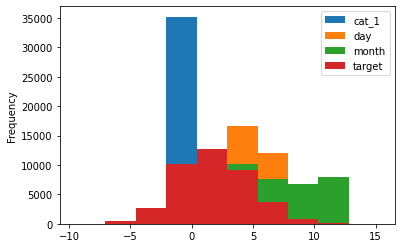

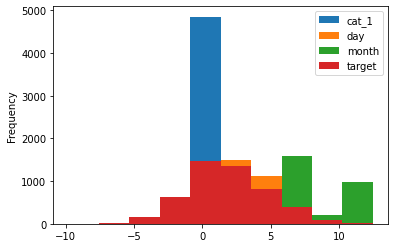

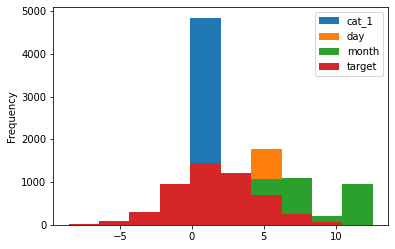

In [5]:
print(X_train.plot.hist())
print(X_val.plot.hist())
print(X_test.plot.hist())

The stratify parameter of the `train_test_split` function is typically used when you have a categorical target variable and you want to ensure that the same proportion of each category is represented in both the training and test sets. However, if you have a regression target variable, the stratify parameter is not directly applicable.

In order to use the stratify parameter, it is possible to bin the numerical target variable into a categorical variable.

**<font color='blue'>3.a. Transform the numerical target into a categorical target using a binning method.**

*Tips: You can use `pd.cut()` or `pd.qcut()`*

In [7]:
df_raw['target'] = pd.qcut(df_raw['target'], 10, precision=2)
df_raw

,cat_1,cat_2,cat_3,cat_4,day,month,target
0,0.0,Red,Trapezoid,Big,6.0,3.0,"(-0.62, 0.17]"
1,1.0,Red,Star,Big,7.0,7.0,"(-9.799999999999999, -1.76]"
2,0.0,Red,NaN,Big,5.0,9.0,"(3.27, 4.29]"
3,NaN,Red,Circle,Small,3.0,3.0,"(3.27, 4.29]"
4,0.0,Red,Triangle,Big,5.0,12.0,"(-9.799999999999999, -1.76]"
...,...,...,...,...,...,...,...
49995,0.0,Red,Polygon,Average,7.0,12.0,"(-0.62, 0.17]"
49996,0.0,Red,Circle,Small,7.0,11.0,"(0.88, 1.62]"
49997,1.0,Red,Circle,Average,6.0,3.0,"(0.88, 1.62]"
49998,NaN,Green,Triangle,Big,1.0,1.0,"(0.17, 0.88]"


**<font color='blue'>3.b. Set the `stratify` parameter of the `train_test_split` function to the binned target column and re-create the training, validation and testing sets.**

In [8]:

X_train, X_test, y_train, y_test = train_test_split(df_raw, df_raw, train_size=0.8, stratify=df_raw['target'])
print(X_train.shape)
print(X_test.shape)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size = 0.5, stratify=X_test['target'])
print(X_test.shape)
print(X_val.shape)

(40000, 7)
(10000, 7)
(5000, 7)
(5000, 7)


In [9]:
X_test['target'].value_counts()

(-9.799999999999999, -1.76]    500
(-1.76, -0.62]                 500
(-0.62, 0.17]                  500
(0.17, 0.88]                   500
(0.88, 1.62]                   500
(1.62, 2.42]                   500
(2.42, 3.27]                   500
(3.27, 4.29]                   500
(4.29, 5.66]                   500
(5.66, 15.31]                  500
Name: target, dtype: int64

**<font color='blue'>4. Display the distribution of the training, the validation and the testing set.<br> Are they identical  ?**

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


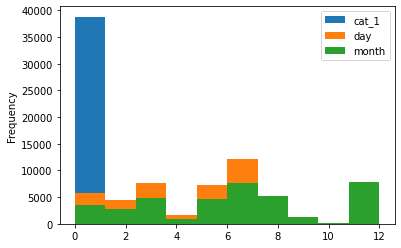

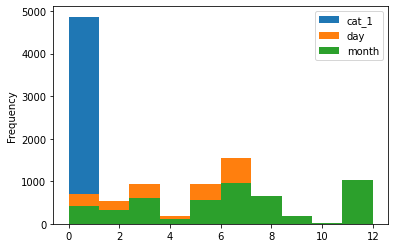

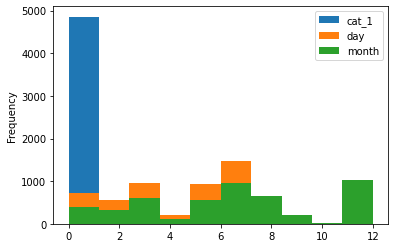

In [10]:
print(X_train.plot.hist())
print(X_val.plot.hist())
print(X_test.plot.hist())

**<font color='blue'>5. Separate the features from the target for the training, the validation and the testing sets.**

In [11]:
X_train = X_train.iloc[:, :-1]
y_train = y_train.iloc[:, -1]
X_val = X_val.iloc[:, :-1]
y_val = y_val.iloc[:, -1]
X_test = X_test.iloc[:, :-1]
y_test = y_test.iloc[:, -1]


## Missing data

The missing values can be found in a dataframe using the `.isna()` method.

**<font color='blue'>1. Count the number of NaN in the feature of the training cat in the dat dataframe.**

*Tips: You can use the `.isna()` method and the `.sum()` method.*

In [12]:
X_train.isna().sum()

cat_1    1219
cat_2    1269
cat_3    1228
cat_4    1234
day      1245
month    1175
dtype: int64

**<font color='blue'>2. Drop the missing values of the training set.<br>How many rows were removed ?**

In [13]:
print(X_train.shape)
X_train_dropped = X_train.dropna(how='any', axis=0)
print(X_train_dropped.shape)
print("{0} of rows were removed".format(X_train.shape[0] - X_train_dropped.shape[0]))

(40000, 6)
(33178, 6)
6822 of rows were removed


**<font color='blue'>3.a. Replace the missing values of the training set by their mode using the `SimpleImputer` from sklearn.<br>3.b. Get the mode values for each columns using the `statistics_` attribute.**

In [14]:
imp_SI = SimpleImputer(strategy='most_frequent')
X_train_no_Nan = pd.DataFrame(imp_SI.fit_transform(X_train), columns=X_train.columns)

In [15]:
print(X_train_no_Nan.info())
print('The mode values are: {0}'.format(imp_SI.statistics_))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cat_1   40000 non-null  object
 1   cat_2   40000 non-null  object
 2   cat_3   40000 non-null  object
 3   cat_4   40000 non-null  object
 4   day     40000 non-null  object
 5   month   40000 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB
None
The mode values are: [0.0 'Red' 'Triangle' 'Small' 3.0 8.0]


**<font color='blue'>4. Apply the missing values imputation to the validation and the testing sets.**

*Tips: You must reuse the computations made on the training set (e.g. the median should not be calculated on the validation and the testing sets)*

In [16]:
#Apply on validation dataset
X_val_no_Nan = pd.DataFrame(imp_SI.fit_transform(X_val), columns=X_val.columns)
#Apply on test dataset
X_test_no_Nan = pd.DataFrame(imp_SI.fit_transform(X_test), columns=X_test.columns)

In [17]:
print(X_val_no_Nan.info())
print(X_test_no_Nan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cat_1   5000 non-null   object
 1   cat_2   5000 non-null   object
 2   cat_3   5000 non-null   object
 3   cat_4   5000 non-null   object
 4   day     5000 non-null   object
 5   month   5000 non-null   object
dtypes: object(6)
memory usage: 234.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cat_1   5000 non-null   object
 1   cat_2   5000 non-null   object
 2   cat_3   5000 non-null   object
 3   cat_4   5000 non-null   object
 4   day     5000 non-null   object
 5   month   5000 non-null   object
dtypes: object(6)
memory usage: 234.5+ KB
None


## Outliers

In the following exercise, we will use the imputed feature training set.

**<font color='blue'>1. Which categorical feature contain outliers ?**

*Tips: Categorical outliers can be seen as "rare" category.*

In [18]:
#Count values to identify which categories are "rare".
print("Cat_1:\n{0}\nCat_2:\n{1}:\nCat_3:\n{2}\nCat_4:\n{3}\nday:\n{4}\nmonth:\n{5}"
      .format(X_train_no_Nan['cat_1'].value_counts(), X_train_no_Nan['cat_2'].value_counts(), 
              X_train_no_Nan['cat_3'].value_counts(), X_train_no_Nan['cat_4'].value_counts(), 
              X_train_no_Nan['day'].value_counts(), X_train_no_Nan['month'].value_counts()))

'''We can see that in feature:
Cat_3: Star, Heart and Diamond are "rare" catogories;
Month: April and October are "rare" catogories.
'''

Cat_1:
0.0    36416
1.0     3584
Name: cat_1, dtype: int64
Cat_2:
Red      22839
Blue     13670
Green     3491
Name: cat_2, dtype: int64:
Cat_3:
Triangle     12073
Polygon      10150
Trapezoid     7983
Circle        6928
Square        1756
Star           934
Heart          134
Diamond         42
Name: cat_3, dtype: int64
Cat_4:
Small      16362
Big        13165
Average    10473
Name: cat_4, dtype: int64
day:
3.0    8908
5.0    7335
6.0    6406
7.0    5714
1.0    5684
2.0    4398
4.0    1555
Name: day, dtype: int64
month:
8.0     6404
3.0     4745
5.0     4619
12.0    4553
6.0     3982
7.0     3637
1.0     3437
11.0    3343
2.0     2846
9.0     1348
4.0      919
10.0     167
Name: month, dtype: int64


'We can see that in feature:\nCat_3: Star, Heart and Diamond are "rare" catogories;\nMonth: April and October are "rare" catogories.\n'

**<font color='blue'>2. Merge the outliers into one "rare" category.**

In [19]:
#Treat column "cat_3":
def cat_3_categorize(x):
    if x in ['Star','Diamond','Heart']:
        a='Rare'
    else:
        a=x
    return a

X_train_no_Nan['cat_3'] = X_train_no_Nan['cat_3'].apply(lambda x: cat_3_categorize(x))
X_train_no_Nan['cat_3'].value_counts()
#Treat column "day":
# def day_categorize(x):
#     if (x == 4.0) or (x == 10.0):
#         a='Rare'
#     else:
#         a=x
#     return a
# X_train_no_Nan['day'] = X_train_no_Nan['day'].apply(lambda x: day_categorize(x))
# X_train_no_Nan['day'].value_counts()

Triangle     12073
Polygon      10150
Trapezoid     7983
Circle        6928
Square        1756
Rare          1110
Name: cat_3, dtype: int64

**<font color='blue'>3. Apply the outlier transformation to the validation and the testing sets.**

In [20]:
#For validation sets:
print("Cat_1:\n{0}\nCat_2:\n{1}:\nCat_3:\n{2}\nCat_4:\n{3}\nday:\n{4}\nmonth:\n{5}"
      .format(X_val_no_Nan['cat_1'].value_counts(), X_val_no_Nan['cat_2'].value_counts(), 
              X_val_no_Nan['cat_3'].value_counts(), X_val_no_Nan['cat_4'].value_counts(), 
              X_val_no_Nan['day'].value_counts(), X_val_no_Nan['month'].value_counts()))

#Apply transformation:
#Treat column "cat_3":
def cat_3_categorize(x):
    if x in ['Star','Diamond','Heart']:
        a='Rare'
    else:
        a=x
    return a

X_val_no_Nan['cat_3'] = X_val_no_Nan['cat_3'].apply(lambda x: cat_3_categorize(x))
X_val_no_Nan['cat_3'].value_counts()
#Treat column "day":
# def day_categorize(x):
#     if (x == 4.0) or (x == 10.0):
#         a='Rare'
#     else:
#         a=x
#     return a
# X_train_no_Nan['day'] = X_train_no_Nan['day'].apply(lambda x: day_categorize(x))
# X_train_no_Nan['day'].value_counts()

Cat_1:
0.0    4543
1.0     457
Name: cat_1, dtype: int64
Cat_2:
Red      2858
Blue     1723
Green     419
Name: cat_2, dtype: int64:
Cat_3:
Triangle     1554
Polygon      1199
Trapezoid     961
Circle        895
Square        249
Star          117
Heart          21
Diamond         4
Name: cat_3, dtype: int64
Cat_4:
Small      2011
Big        1697
Average    1292
Name: cat_4, dtype: int64
day:
3.0    1096
5.0     926
6.0     848
7.0     707
1.0     692
2.0     538
4.0     193
Name: day, dtype: int64
month:
8.0     798
12.0    612
3.0     600
5.0     549
6.0     502
7.0     464
11.0    420
1.0     407
2.0     335
9.0     180
4.0     117
10.0     16
Name: month, dtype: int64


Triangle     1554
Polygon      1199
Trapezoid     961
Circle        895
Square        249
Rare          142
Name: cat_3, dtype: int64

In [21]:
#For test sets:
print("Cat_1:\n{0}\nCat_2:\n{1}:\nCat_3:\n{2}\nCat_4:\n{3}\nday:\n{4}\nmonth:\n{5}"
      .format(X_test_no_Nan['cat_1'].value_counts(), X_test_no_Nan['cat_2'].value_counts(), 
              X_test_no_Nan['cat_3'].value_counts(), X_test_no_Nan['cat_4'].value_counts(), 
              X_test_no_Nan['day'].value_counts(), X_test_no_Nan['month'].value_counts()))

#Apply transformation
X_test_no_Nan['cat_3'] = X_test_no_Nan['cat_3'].apply(lambda x: cat_3_categorize(x))
X_test_no_Nan['cat_3'].value_counts()

Cat_1:
0.0    4536
1.0     464
Name: cat_1, dtype: int64
Cat_2:
Red      2841
Blue     1736
Green     423
Name: cat_2, dtype: int64:
Cat_3:
Triangle     1520
Polygon      1319
Trapezoid    1024
Circle        820
Square        181
Star          119
Heart          13
Diamond         4
Name: cat_3, dtype: int64
Cat_4:
Small      2067
Big        1626
Average    1307
Name: cat_4, dtype: int64
day:
3.0    1101
5.0     941
6.0     789
1.0     718
7.0     686
2.0     560
4.0     205
Name: day, dtype: int64
month:
8.0     802
3.0     594
12.0    576
5.0     563
6.0     509
11.0    448
7.0     446
1.0     395
2.0     325
9.0     200
4.0     119
10.0     23
Name: month, dtype: int64


Triangle     1520
Polygon      1319
Trapezoid    1024
Circle        820
Square        181
Rare          136
Name: cat_3, dtype: int64

# Transformation

**In the following exercise, we will use the cleaned cat in the dat training dataset <br>*i.e. the dataset without any missing values and outliers obtained at the previous exercise.***

## Ordinal Encoding

Ordinal encoding is a technique for encoding categorical features as numerical values in a way that preserves the order or ranking of the categories.

The scikit-learn library provides a convenient OrdinalEncoder class for performing ordinal encoding on categorical features. The OrdinalEncoder class takes a list of categorical features as input and returns a numerical array with the same shape as the input, where each categorical value is replaced with a numerical value based on its order or ranking.

Here are some of the most useful parameters:

* **`categories`**: This parameter can be used to explicitly specify the categories for each feature. It should be a list of lists, where each inner list contains the categories for the corresponding feature. If this parameter is not provided, the encoder will automatically infer the categories from the input data.

* **`handle_unknown`**: This parameter specifies how to handle unknown categories that are encountered during the transformation. It can be set to error to raise an error or use_encoded_value to assign the value -1 to unknown categories.

* **`unknown_value`**: This parameter specifies the value to assign to unknown categories if handle_unknown is set to value. By default, it is set to None, which means that the encoder will raise an error if it encounters unknown categories.

Ordinal Encoder can be used as follows:

```
encoder = OrdinalEncoder(...)
encoder.fit(X_train)
X_train_enc = encoder.transform(X_train)
```

**<font color='blue'>1. Apply the Ordinal Encoding to the ordinal feature(s) of the dataset.**

*Tips: Specify the feature categories in the correct order in the categories parameter*

In [22]:
X_train_no_Nan

,cat_1,cat_2,cat_3,cat_4,day,month
0,0.0,Green,Circle,Big,1.0,10.0
1,0.0,Blue,Polygon,Average,2.0,6.0
2,0.0,Blue,Circle,Small,1.0,8.0
3,0.0,Green,Triangle,Average,5.0,12.0
4,0.0,Red,Square,Average,1.0,4.0
...,...,...,...,...,...,...
39995,0.0,Red,Triangle,Big,1.0,8.0
39996,0.0,Red,Circle,Small,3.0,8.0
39997,0.0,Red,Triangle,Average,3.0,3.0
39998,0.0,Red,Trapezoid,Small,3.0,8.0


In [24]:
#Small < Average < Big
X_train_OrEncoding = X_train_no_Nan.copy()
OEncoder = OrdinalEncoder(categories=[['Small', 'Average', 'Big']], handle_unknown="error")
OEncoder.fit(X_train_no_Nan[['cat_4']])
X_train_OrEncoding[['cat_4']] = OEncoder.transform(X_train_OrEncoding[['cat_4']])
X_train_OrEncoding

,cat_1,cat_2,cat_3,cat_4,day,month
0,0.0,Green,Circle,2.0,1.0,10.0
1,0.0,Blue,Polygon,1.0,2.0,6.0
2,0.0,Blue,Circle,0.0,1.0,8.0
3,0.0,Green,Triangle,1.0,5.0,12.0
4,0.0,Red,Square,1.0,1.0,4.0
...,...,...,...,...,...,...
39995,0.0,Red,Triangle,2.0,1.0,8.0
39996,0.0,Red,Circle,0.0,3.0,8.0
39997,0.0,Red,Triangle,1.0,3.0,3.0
39998,0.0,Red,Trapezoid,0.0,3.0,8.0


Standardizing the output of ordinal encoding is generally not necessary if the feature is already ordinal. <br>However, **if the ordinal feature has a large range or if its values have a large variance, it may be beneficial to standardize the output of ordinal encoding.**

As always in Machine Learning, there is no free meal.<br> Thus, it is appropriate to try different preprocessing.

**<font color='blue'>2. Just for the example, scale the output of the ordinal encoding.**

*Tips: You can using z-score scaling, min-max scaling, absolute max scaling ...*

In [25]:
MMScaler = MinMaxScaler()
X_train_OrEncoding.loc[:, ['cat_4']] = MMScaler.fit_transform(X_train_OrEncoding.loc[:, ['cat_4']])
X_train_OrEncoding

,cat_1,cat_2,cat_3,cat_4,day,month
0,0.0,Green,Circle,1.0,1.0,10.0
1,0.0,Blue,Polygon,0.5,2.0,6.0
2,0.0,Blue,Circle,0.0,1.0,8.0
3,0.0,Green,Triangle,0.5,5.0,12.0
4,0.0,Red,Square,0.5,1.0,4.0
...,...,...,...,...,...,...
39995,0.0,Red,Triangle,1.0,1.0,8.0
39996,0.0,Red,Circle,0.0,3.0,8.0
39997,0.0,Red,Triangle,0.5,3.0,3.0
39998,0.0,Red,Trapezoid,0.0,3.0,8.0


**<font color='blue'>3. Apply the Ordinal Encoding and the scaling on the ordinal feature(s) of the test set and the validation set.**

In [26]:
#Apply on validation set:
#Encoding
X_val_OrEncoding = X_val_no_Nan.copy()
OEncoder.fit(X_val_OrEncoding[['cat_4']])
X_val_OrEncoding[['cat_4']] = OEncoder.transform(X_val_OrEncoding[['cat_4']])


#Scaling
X_val_OrEncoding.loc[:, ['cat_4']] = MMScaler.fit_transform(X_val_OrEncoding.loc[:, ['cat_4']])
X_val_OrEncoding

,cat_1,cat_2,cat_3,cat_4,day,month
0,0.0,Red,Square,1.0,5.0,6.0
1,0.0,Red,Polygon,0.0,3.0,2.0
2,0.0,Red,Triangle,0.0,3.0,5.0
3,0.0,Red,Circle,1.0,5.0,1.0
4,0.0,Red,Triangle,0.5,5.0,4.0
...,...,...,...,...,...,...
4995,0.0,Blue,Rare,1.0,7.0,1.0
4996,1.0,Blue,Circle,1.0,7.0,5.0
4997,0.0,Blue,Triangle,1.0,6.0,4.0
4998,0.0,Blue,Square,0.0,2.0,12.0


In [27]:
#Apply on test set:
#Encoding
X_test_OrEncoding = X_test_no_Nan.copy()
OEncoder.fit(X_test_OrEncoding[['cat_4']])
X_test_OrEncoding[['cat_4']] = OEncoder.transform(X_test_OrEncoding[['cat_4']])


#Scaling
X_test_OrEncoding.loc[:, ['cat_4']] = MMScaler.fit_transform(X_test_OrEncoding.loc[:, ['cat_4']])
X_test_OrEncoding

,cat_1,cat_2,cat_3,cat_4,day,month
0,0.0,Green,Circle,1.0,5.0,4.0
1,0.0,Red,Polygon,0.5,2.0,5.0
2,0.0,Blue,Polygon,1.0,7.0,8.0
3,0.0,Red,Polygon,1.0,6.0,4.0
4,1.0,Red,Circle,1.0,7.0,2.0
...,...,...,...,...,...,...
4995,0.0,Green,Trapezoid,1.0,3.0,12.0
4996,0.0,Red,Rare,0.0,5.0,3.0
4997,0.0,Blue,Circle,0.0,5.0,5.0
4998,0.0,Blue,Circle,0.5,7.0,5.0


## One Hot Encoding

**One Hot encoding** is a technique for encoding categorical features as binary vectors in a way that enables machine learning algorithms to treat each category as a separate feature.

The scikit-learn library provides a convenient OneHotEncoder class for performing One Hot encoding on categorical features. The OneHotEncoder class takes a list of categorical features as input and returns a sparse matrix with the same number of rows as the input, where each row is a binary vector representing the presence or absence of each category.

Here are some of the most useful parameters:

* **`categories`**: This parameter can be used to explicitly specify the categories for each feature. It should be a list of lists, where each inner list contains the categories for the corresponding feature. If this parameter is not provided, the encoder will automatically infer the categories from the input data.

* **`drop`**: This parameter specifies whether to drop one of the categories for each feature to avoid collinearity. By default, it is set to None, which means that all categories are kept. If it is set to `first`, the first category in each feature will be dropped, and if it is set to `if_binary`, it drops the first category in each feature with two categories.

* **`handle_unknown`**: This parameter specifies how to handle unknown categories that are encountered during the transformation. It can be set to `error` to raise an error, `ignore` to assign a row of all zeros to unknown categories, or `infrequent_if_exist` to assign a specified value to unknown categories.

*  **`sparse_output`**: This parameter specifies whether to return a sparse matrix or a dense array. By default, it is set to True, which means that a sparse matrix is returned.

One Hot Encoder can be used as follows:

```
encoder = OneHotEncoder(...)
encoder.fit(X_train)
X_train_enc = encoder.transform(X_train)
```

**<font color='blue'>1. Apply the One Hot Encoding to the nominal feature(s) of the dataset.**

*Tips: Don't forget to use `sparse_output=False` to return a Numpy array.*

In [43]:
X_train_OrEncoding['cat_3'].value_counts()

Triangle     12115
Polygon      10193
Trapezoid     7939
Circle        6890
Square        1754
Rare          1109
Name: cat_3, dtype: int64

In [28]:
OHEncoder = OneHotEncoder(categories = [['Red', 'Green', "Blue"], ['Triangle', 'Polygon', 'Trapezoid', "Circle", "Square", "Rare"]], handle_unknown='error', sparse=False)
X_train_OHEncoding = X_train_OrEncoding.copy()
OHEncoder.fit(X_train_OHEncoding[['cat_2', 'cat_3']])
X_train_OHEncoding_output = OHEncoder.transform(X_train_OHEncoding[['cat_2', 'cat_3']])
X_train_OHEncoding_output

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

The output of the `OneHotEncoder` is a Numpy array (*if `sparse_output=False`*) without the name of the columns.

Fortunately, `OneHotEncoder` provides the `get_feature_names_out()` function that can be used to retrieve the names of the features in the encoded output array.

```
feature_names = encoder.get_feature_names_out()
```

**<font color='blue'>2.a. Get the names of the One Hot features.<br>2.b. Create a dataframe with the one hot encoded features and their names.**

*Tips: You can transform all the features simultaneously if you are using a Pandas dataframe or a Numpy array.*

In [63]:
#2.a
columns = OHEncoder.get_feature_names_out()
#2.b
df_OHE_train = pd.DataFrame(X_train_OHEncoding_output, columns=columns)
df_OHE_train

,cat_2_Red,cat_2_Green,cat_2_Blue,cat_3_Triangle,cat_3_Polygon,cat_3_Trapezoid,cat_3_Circle,cat_3_Square,cat_3_Rare
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
39995,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39996,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**<font color='blue'>3. Apply the One Hot Encoding on the nominal features of the test set and the validation set.**

In [36]:
#Apply on test set
X_test_OHEncoding = X_test_OrEncoding.copy()
OHEncoder.fit(X_test_OHEncoding[['cat_2', 'cat_3']])
X_test_OHEncoding_output = OHEncoder.transform(X_test_OHEncoding[['cat_2', 'cat_3']])

X_test_OHEncoding_output

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [37]:
df_OHE_test = pd.DataFrame(X_test_OHEncoding_output, columns=columns)
df_OHE_test

,cat_2_Red,cat_2_Green,cat_2_Blue,cat_3_Triangle,cat_3_Polygon,cat_3_Trapezoid,cat_3_Circle,cat_3_Square,cat_3_Rare
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4995,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4998,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
#Apply on validation set
X_val_OHEncoding = X_val_OrEncoding.copy()
OHEncoder.fit(X_val_OHEncoding[['cat_2', 'cat_3']])
X_val_OHEncoding_output = OHEncoder.transform(X_val_OHEncoding[['cat_2', 'cat_3']])
df_OHE_val = pd.DataFrame(X_val_OHEncoding_output, columns=columns)
df_OHE_val

,cat_2_Red,cat_2_Green,cat_2_Blue,cat_3_Triangle,cat_3_Polygon,cat_3_Trapezoid,cat_3_Circle,cat_3_Square,cat_3_Rare
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4997,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Cyclical Encoding

Cyclical categories can be encoded using the **sine and cosine functions**.

**<font color='blue'>1.a. Calculate $sin(2\pi X/n)$ on the cyclical features with X the feature and n the period.**

In [40]:
X_train_no_Nan.head(5)

,cat_1,cat_2,cat_3,cat_4,day,month
0,0.0,Green,Circle,Big,1.0,10.0
1,0.0,Blue,Polygon,Average,2.0,6.0
2,0.0,Blue,Circle,Small,1.0,8.0
3,0.0,Green,Triangle,Average,5.0,12.0
4,0.0,Red,Square,Average,1.0,4.0


In [57]:
#Cyclical features: day and month
#sin
def CEncoding_sin(X, n):
    x = np.sin((2* np.pi* X) / n)
    return x

X_CEncoding_train = X_train_no_Nan.copy()
CEncoding_sin_train = pd.DataFrame({
    "day_sin": X_CEnoding_train['day'].apply(lambda x: CEncoding_sin(x, 7)),
    "month_sin": X_CEnoding_train['month'].apply(lambda x: CEncoding_sin(x, 12))
})


In [58]:
CEncoding_sin_train

,day_sin,month_sin
0,0.781831,-8.660254e-01
1,0.974928,1.224647e-16
2,0.781831,-8.660254e-01
3,-0.974928,-2.449294e-16
4,0.781831,8.660254e-01
...,...,...
39995,0.781831,-8.660254e-01
39996,0.433884,-8.660254e-01
39997,0.433884,1.000000e+00
39998,0.433884,-8.660254e-01


**<font color='blue'>1.b. Do the same with $cos(2\pi X/n)$.**

In [59]:
#cos
def CEncoding_cos(X, n):
    x = np.cos((2* np.pi* X) / n)
    return x

CEncoding_cos_train = pd.DataFrame({
    "day_cos": X_CEnoding_train['day'].apply(lambda x: CEncoding_cos(x, 7)),
    "month_cos": X_CEnoding_train['month'].apply(lambda x: CEncoding_cos(x, 12))
})

In [60]:
CEncoding_cos_train

,day_cos,month_cos
0,0.623490,5.000000e-01
1,-0.222521,-1.000000e+00
2,0.623490,-5.000000e-01
3,-0.222521,1.000000e+00
4,0.623490,-5.000000e-01
...,...,...
39995,0.623490,-5.000000e-01
39996,-0.900969,-5.000000e-01
39997,-0.900969,6.123234e-17
39998,-0.900969,-5.000000e-01


**<font color='blue'>2. Display the cosine and the sine values on a scatter plot.**

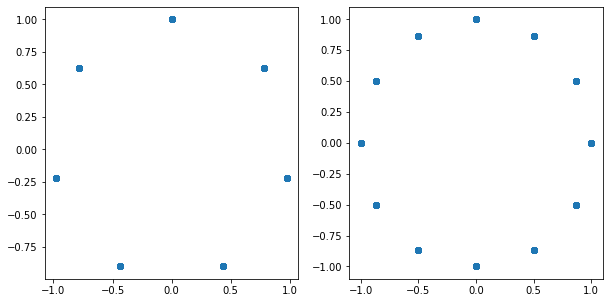

In [55]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(CEncoding_sin_train['day'], CEncoding_cos_train['day'])
plt.subplot(122)
plt.scatter(CEncoding_sin_train['month'], CEncoding_cos_train['month'])
plt.show()

## Putting together

If the preprocessing steps are done separately, it is generally appropriate to concatenate them back into one unique dataset.

It may be useful to use Pipelines such as the ColumnTransformer [from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer).

**<font color='blue'>Concatenate all the encoded features back into one dataset.**

In [73]:

t = [
    ('cat_1', X_train_OrEncoding['cat_1'], 0),
    (df_OHE_train.columns, df_OHE_train, [1,2,3,4,5,6,7,8,9]),
    ('cat_4', X_train_OrEncoding['cat_4'], 10),
    ([''], CEncoding_sin_train, [11,12]),
    (CEncoding_cos_train.columns, CEncoding_cos_train, [13,14]),
]
df_final = ColumnTransformer(transformers=t)

NameError: name 'cat_1' is not defined

In [72]:
df_final

ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

ColumnTransformer(transformers=[('cat_1',
                                 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39995    0.0
39996    0.0
39997    0.0
39998    0.0
39999    0.0
Name: cat_1, Length: 40000, dtype: object,
                                 0),
                                (Index(['cat_2_Red', 'cat_2_Green', 'cat_2_Blue', 'cat_3_Triangle',
       'cat_3_Polygon', 'cat_3_Trapezoid', 'cat_3_Circle', 'cat_3_Square',
       'cat_3_Rare'],
      dtype='object'),
                                        cat_2_Red  cat_2_Green  cat_2_Blue  cat_3_Triangle  cat_...
                                 [11, 12]),
                                (Index(['day_cos', 'month_cos'], dtype='object'),
                                         day_cos     month_cos
0      0.623490  5.000000e-01
1     -0.222521 -1.000000e+00
2      0.623490 -5.000000e-01
3     -0.222521  1.000000e+00
4      0.623490 -5.000000e-01
...         ...           ...
39995  0.6234